# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#Empty list for holging lat, long, and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# random set of lat and lng coords:
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list

In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

city_data = []
#set units
units = 'metric'

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if ((i % 50 == 0 )and (i >= 50)):
        set_count +=1
        record_count = 0

    # endpoint url for each city
    city_url = f'{base_url}q={city}&appid={weather_api_key}&units={units}'

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        city_data.append({
            "City": city, 
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print(f"City {city} not found. Skipping/...")


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | tir pul
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | lovington
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | puerto san carlos
City puerto san carlos not found. Skipping/...
Processing Record 17 of Set 1 | nagato
Processing Record 18 of Set 1 | makurazaki
Processing Record 19 of Set 1 | xining
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | pascagoul

In [4]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-4.09,68,40,8.75,SJ,1701888056
1,tir pul,34.5943,61.2690,8.14,44,90,0.96,AF,1701888279
2,puerto natales,-51.7236,-72.4875,13.25,44,40,9.26,CL,1701888063
3,port-aux-francais,-49.3500,70.2167,5.02,83,100,9.02,TF,1701888054
4,mount gambier,-37.8333,140.7667,9.08,85,100,1.48,AU,1701887936


In [6]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

### Import csv

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-4.09,68,40,8.75,SJ,1701888056
1,tir pul,34.5943,61.2690,8.14,44,90,0.96,AF,1701888279
2,puerto natales,-51.7236,-72.4875,13.25,44,40,9.26,CL,1701888063
3,port-aux-francais,-49.3500,70.2167,5.02,83,100,9.02,TF,1701888054
4,mount gambier,-37.8333,140.7667,9.08,85,100,1.48,AU,1701887936


### Create the Scatter Plots

#### Latitude Vs. Temperature

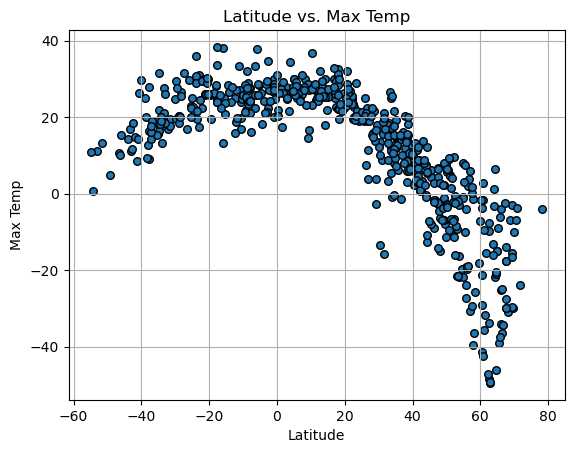

In [8]:
city_data_df.plot(x = 'Lat', y = 'Max Temp', kind = 'scatter', edgecolors = 'black', s = 30)
plt.title('Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.grid()

#### Latitude Vs. Humidity

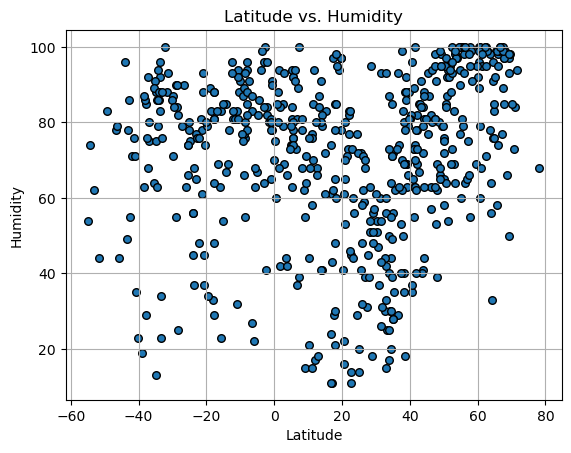

In [9]:
city_data_df.plot(x = 'Lat', y = 'Humidity', kind = 'scatter', edgecolors = 'black', s = 30)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.grid()

#### Latitude Vs. Cloudiness

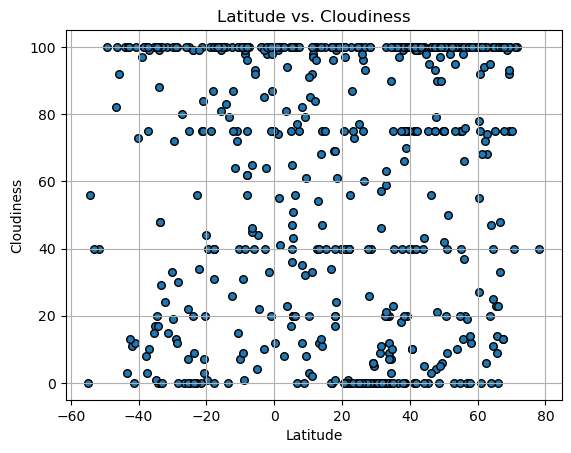

In [10]:
city_data_df.plot(x = 'Lat', y = 'Cloudiness', kind = 'scatter', edgecolors = 'black', s = 30)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.grid()

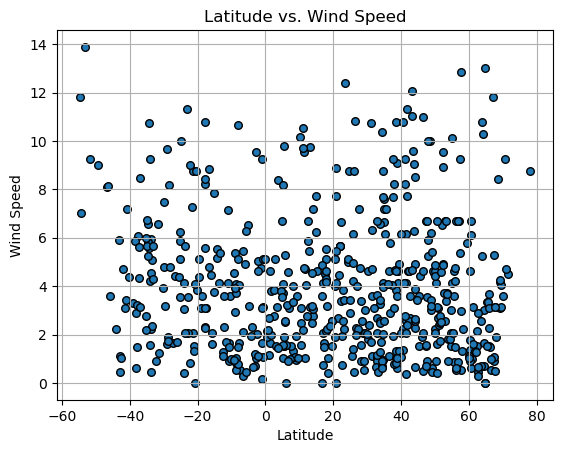

In [11]:
city_data_df.plot(x = 'Lat', y = 'Wind Speed', kind = 'scatter', edgecolors = 'black', s = 30)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.grid()

---

## Compute Linear Regression for Each Relationship


In [12]:
def plot_lin_regress(x_val, y_val):
    slope, y_int, _, __, ___ = linregress(x_val, y_val)
    fit = slope * x_val + y_int

    plt.scatter(x_val, y_val, label = 'data', edgecolors = 'black', s = 30)
    plt.plot(x_val, fit, color = 'white', label = 'fit', 
             path_effects=[pe.withStroke(linewidth=4, foreground="black")],
             ms = 100)
    plt.legend(loc = 'best')
    return slope, y_int

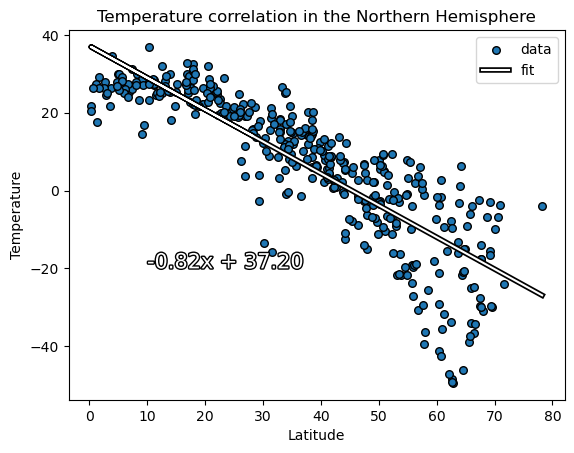

In [13]:
north_lat = city_data_df.loc[city_data_df['Lat'] >= 0]
south_lat = city_data_df.loc[city_data_df['Lat'] <= 0]
x_val_north = north_lat['Lat']
x_val_south = south_lat['Lat']

y_val_temp_north = north_lat['Max Temp']

slope, y_int = plot_lin_regress(x_val_north, y_val_temp_north)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature correlation in the Northern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (10, -20),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()


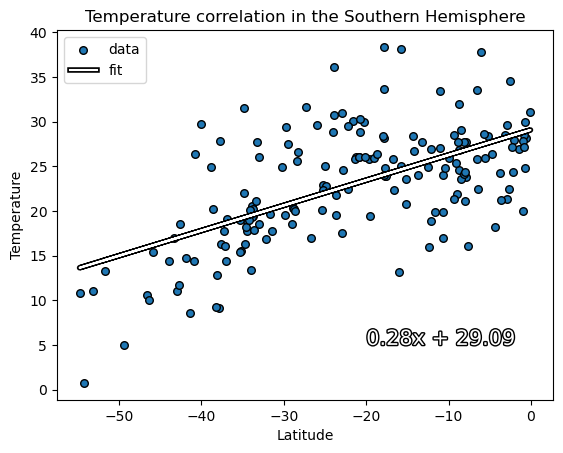

In [14]:

y_val_temp_south = south_lat['Max Temp']

slope, y_int = plot_lin_regress(x_val_south, y_val_temp_south)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature correlation in the Southern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (-20, 5),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

### Humidity vs. Latitude Linear Regression Plot

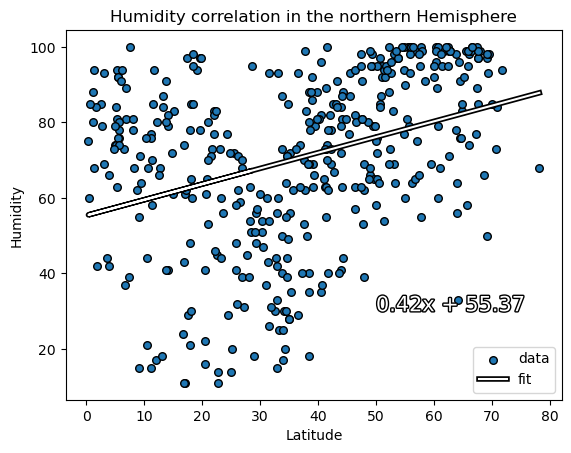

In [15]:
y_val_humidity_north = north_lat['Humidity']

slope, y_int = plot_lin_regress(x_val_north, y_val_humidity_north)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity correlation in the northern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (50, 30),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

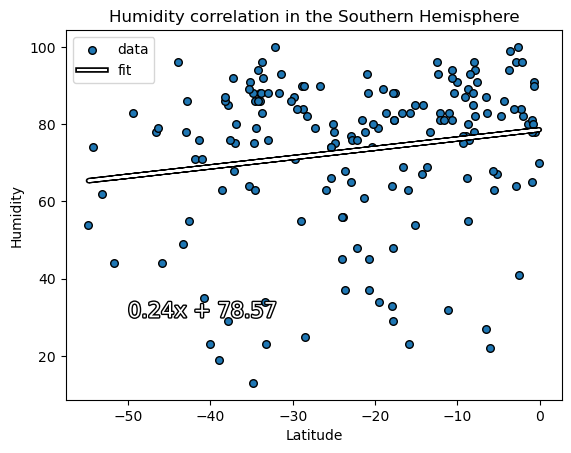

In [16]:
y_val_humidity_south = south_lat['Humidity']

slope, y_int = plot_lin_regress(x_val_south, y_val_humidity_south)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity correlation in the Southern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (-50, 30),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

#### Latitude Vs. Cloudiness

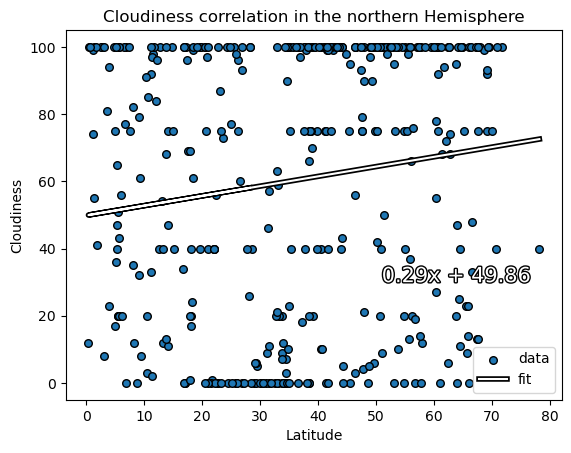

In [17]:
y_val_cloudiness_north = north_lat['Cloudiness']

slope, y_int = plot_lin_regress(x_val_north, y_val_cloudiness_north)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness correlation in the northern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (51, 30),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

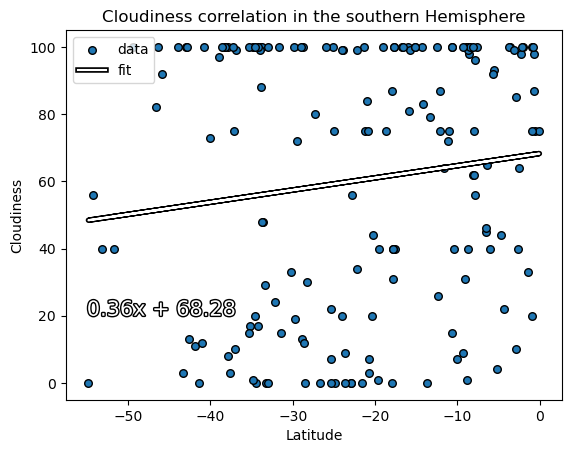

In [18]:
y_val_cloudiness_south = south_lat['Cloudiness']

slope, y_int = plot_lin_regress(x_val_south, y_val_cloudiness_south)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness correlation in the southern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (-55, 20),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

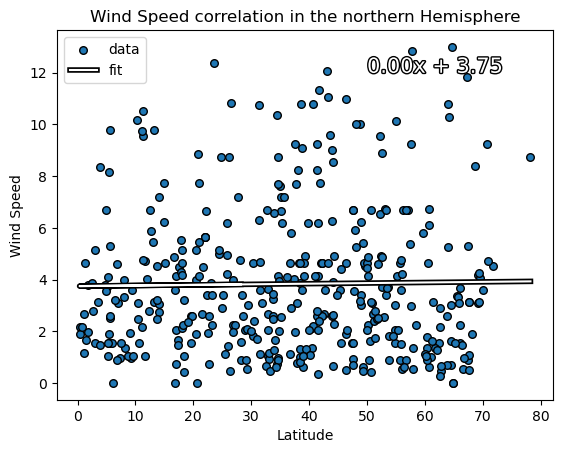

In [19]:
y_val_ws_north = north_lat['Wind Speed']

slope, y_int = plot_lin_regress(x_val_north, y_val_ws_north)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed correlation in the northern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (50, 12),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()

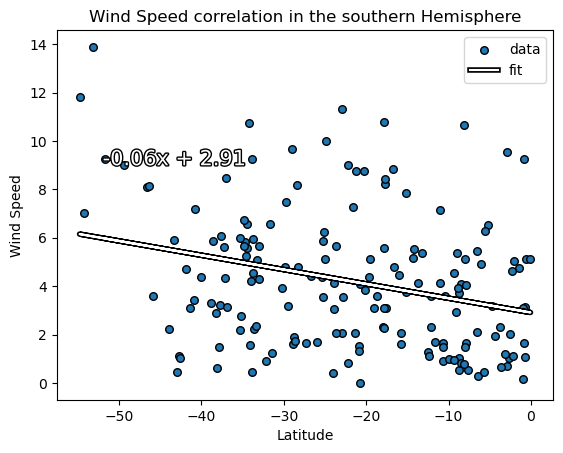

In [20]:
y_val_ws_south = south_lat['Wind Speed']

slope, y_int = plot_lin_regress(x_val_south, y_val_ws_south)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed correlation in the southern Hemisphere')

str_eq = f'{slope:.2f}x + {y_int:.2f}'
plt.annotate(str_eq, (-52, 9),fontsize=15,
             color='white',
              path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.show()